# Quickstart Geospatial Data Visualisation in Python

## Notebook 1: Overview / Recap of key Python packages

##### Luke Roantree
##### Produced for Government Geography Profession "30 Day Map Challenge" series

---

# Before Starting:

#### Before trying to work through the main notebook, you should make sure you're comfortable with the basics of the scientific python ecosystem (mainly numpy, pandas, matplotlib - scipy and scikit-learn won't be used here). 
#### If you're not familiar with these packages yet, that's okay - we'll have a quick recap of them here first and we've added links and references for more extensive guides/tutorials on these packages if you get stuck or have questions.

# Python Libraries that we'll use:

### NumPy: Numerical Python; library for efficient linear algebra operations (and more)
* mostly written in C / Fortran, highly efficient
* most data / maths based packages use or extend numpy data structures
* most important aspect we'll use here: numpy data structures, within pandas/geopandas
* quickstart tutorial: https://numpy.org/doc/stable/user/quickstart.html


### Matplotlib: MATLAB Plot Library; library for data visualisation.
* originally intended to replicate MATLAB plotting utilities. 
* most alternative data vis libraries are built on top of mpl, so it's best to learn first
* great documentation, guides, and examples with code: https://matplotlib.org/


### Pandas: Python Data Analysis; library for efficient operations on structured data
* lead developer comes from an R background; the package feels very similar to R as a result 
* comparisons w/ R:
  - https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_r.html
  - https://datascientyst.com/pandas-vs-r-cheat-sheet/
* good documentation, however there are some common surprises to watch out for: https://pandas.pydata.org/docs/user_guide/index.html


### GeoPandas - Geospatial Pandas; extends Pandas to interact with geospatial data
* quick to pick up if you're familiar with pandas & matplotlib
* can read/write geospatial data formats like `.shp` and `.geojson`
* choice of backend engines: `pyogrio` or `fiona`
* adapts plotting utilities to enable map visualisations
* good quickstart tutorials / documentation: https://geopandas.org/en/latest/getting_started.html


In [1]:
# import the Python packages that we'll be using:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from geodatasets import get_path

Matplotlib is building the font cache; this may take a moment.


# (1) Quick overview/recap of Matplotlib:
## Estimate: 8 mins

#### First, we'll create some arbitrary data (with numpy) to visualise:

##### We'll make two noisy sinusoids, and plot them directly without configuring any settings

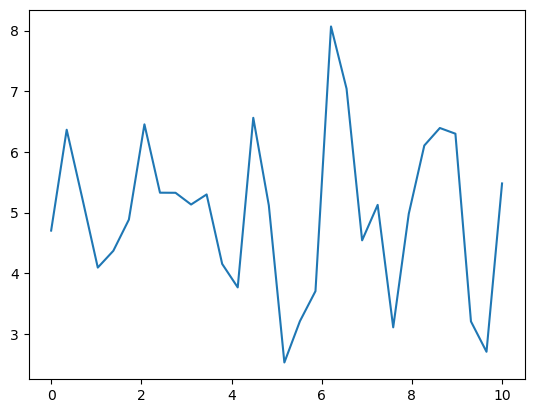

In [21]:
x_arb_data = np.linspace(0,10,num=30)
y_arb_data_1 = np.random.normal(loc=5, scale=1, size=30) + 1.5*np.sin(x_arb_data*np.pi)
y_arb_data_2 = np.random.normal(loc=5, scale=1, size=30) + 1.5*np.sin(x_arb_data*np.pi)

plt.plot(x_arb_data, y_arb_data_1)

#### If we want to change the plot stlye from the default 'line', we can do that quite easily:

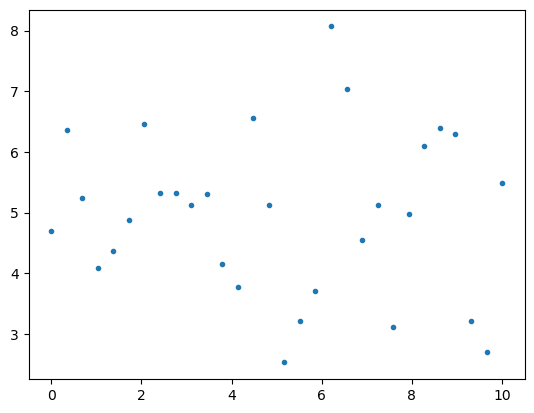

In [22]:
plt.plot(x_arb_data, y_arb_data_1, '.')

#### We can change other parameters too, such as colour, linewidth, marker size, linestyle, opacity - and we can have multiple plots on the same figure:

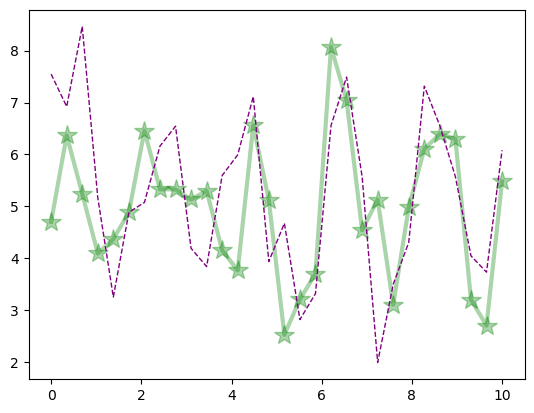

In [23]:
plt.plot(x_arb_data, y_arb_data_1, color='green', ls='-', lw=3, marker='*', ms=15, alpha=0.333)
plt.plot(x_arb_data, y_arb_data_2, color='purple', ls='--', lw=1, alpha=1)

#### There's *lots* more we can do with matplotlib, but before we look at anything more advanced, it's good to get a handle on the 'Figure' and 'Axes' components;

* The 'Figure' object is drawn on by 'Artists'. It will usually contain one or more 'Axes'.
* If you define the figure explicitly, it's easier to control the size / style of it.
* It also means you can directly edit existing figures, instead of creating them from scratch.

##### Let's make a figure (a Figure object) and add a single subplot (an Axis object), and re-create the previous graph

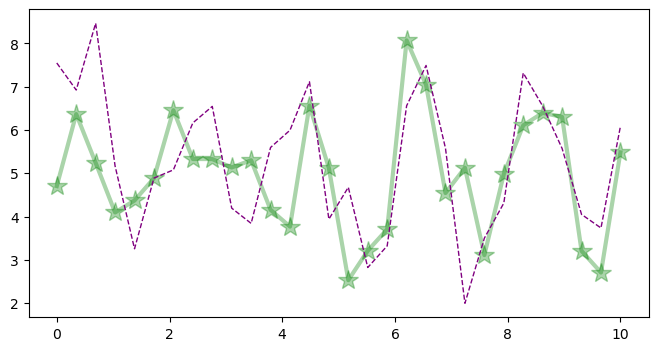

In [24]:
fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot()
ax.plot(x_arb_data, y_arb_data_1, color='green', ls='-', lw=3, marker='*', ms=15, alpha=0.333)
ax.plot(x_arb_data, y_arb_data_2, color='purple', ls='--', lw=1, alpha=1)

#### Alright, now lets explore making it more descriptive;

##### (also, note that the figure in the cell *above* will update, unless we explicitly create a new figure and associate the subplot with it)

##### We will:
* (1) add labels to the individual plots, so we can access them later
* (2) add axis labels, with some arbitrary customisation
* (3) add a grid
* (4) add a legend
* (5) add both an axis-level title, and a figure-level title

(Note: (5) is more relevant when you have multiple Axes on a single Figure, and most labels etc. can be done at both axis-level and figure-level)

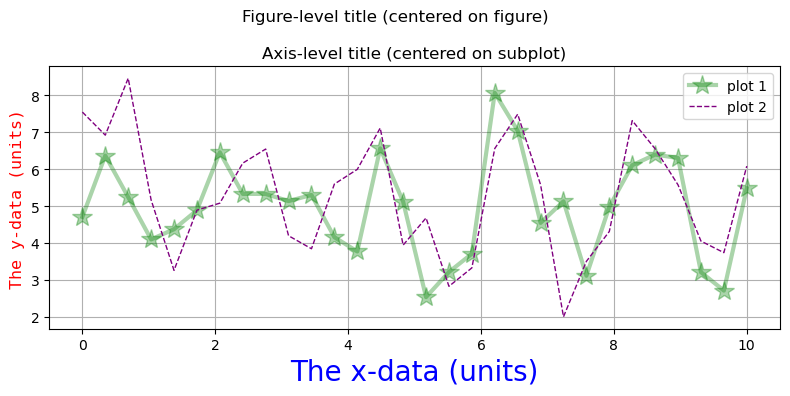

In [25]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()

# (1)
ax.plot(x_arb_data, y_arb_data_1, color='green', ls='-', lw=3, marker='*', ms=15, alpha=0.333, label='plot 1')
ax.plot(x_arb_data, y_arb_data_2, color='purple', ls='--', lw=1, alpha=1, label='plot 2')

# (2)
ax.set_xlabel('The x-data (units)', fontsize=20, color='blue', fontdict={'fontfamily': 'sans-serif'})
ax.set_ylabel('The y-data (units)', fontsize=12, color='red', fontdict={'fontfamily': 'monospace'})

# (3)
ax.grid(True)

# (4)
ax.legend(loc='upper right')

# (5)
ax.set_title('Axis-level title (centered on subplot)')
fig.suptitle('Figure-level title (centered on figure)')

# sometimes mpl finds it hard to determine figure / axis level boundaries,
# so it's safest to make it re-evaluate these before finishing;
fig.tight_layout(h_pad=2, w_pad=4) # you can specify additional padding if desired

#### Last step is to save the figure to a file. 
##### We'll save a few versions to showcase the options

In [26]:
fig.savefig('mpl_demo_1.png', dpi=250, transparent=True) # automatically parses filetype from name
fig.savefig('mpl_demo_1b.png', dpi=100, transparent=True, bbox_inches="tight") # alternative to setting 'tight_layout' on Figure object
fig.savefig('mpl_demo_2.pdf', dpi=250, transparent=False, edgecolor=None)
fig.savefig('mpl_demo_3.svg') # vector formats are supported

In [27]:
# Those files now exist in our current directory:
!ls ./mpl*png ./mpl*pdf ./mpl*svg

./mpl_demo_1.png  ./mpl_demo_1b.png ./mpl_demo_2.pdf  ./mpl_demo_3.svg


# (2) Quick overview/recap of Pandas:
## Estimate: 6 mins

#### The main feature of Pandas is the 'dataframe' class.
##### We can create one manually - Pandas will automatically add an 'index' column (unless we tell it to treat an existing column as the index).
##### We can also add new columns from existing ones (or from other data sources)

In [28]:
df_example = pd.DataFrame({'col_1': [1,3,5,7],
                           'col_2': [2.0,4.0,6.0,8.0]})

df_example['col_3'] = df_example['col_1'] * df_example['col_2']

df_example

,col_1,col_2,col_3
0,1,2.0,2.0
1,3,4.0,12.0
2,5,6.0,30.0
3,7,8.0,56.0


#### A dataframe can contain columns of multiple datatypes

In [29]:
df_example['col_4'] = ['a string', 'string 2', 'string 3','another string']
df_example

,col_1,col_2,col_3,col_4
0,1,2.0,2.0,a string
1,3,4.0,12.0,string 2
2,5,6.0,30.0,string 3
3,7,8.0,56.0,another string


#### common things you'll want from your dataframe are:
* column titles
* descriptive statistics (numerical type columns only)
* number of NaNs / missing values

In [30]:
print(df_example.columns, 
      '\n-----------------------------------------------------------')
print(df_example.describe(), 
      '\n------------------------------------')
print(df_example.isna().sum())

Index(['col_1', 'col_2', 'col_3', 'col_4'], dtype='object') 
-----------------------------------------------------------
          col_1     col_2      col_3
count  4.000000  4.000000   4.000000
mean   4.000000  5.000000  25.000000
std    2.581989  2.581989  23.692474
min    1.000000  2.000000   2.000000
25%    2.500000  3.500000   9.500000
50%    4.000000  5.000000  21.000000
75%    5.500000  6.500000  36.500000
max    7.000000  8.000000  56.000000 
------------------------------------
col_1    0
col_2    0
col_3    0
col_4    0
dtype: int64


#### Often, you'll want to filter or group your data.
##### We'll add a column to let us group the data into two categories (A and B)
##### Then, we'll apply a filter (only keeping rows where col_5 is 'B') and assign it to a new dataframe
##### In the next cell, we'll instead group-by col_5, and aggregate rows in the groups by summing them

In [31]:
df_example['col_5'] = ['A','B','B','A']

# Filtering:
filtered_df_example = df_example[df_example['col_5']=='B']
filtered_df_example

,col_1,col_2,col_3,col_4,col_5
1,3,4.0,12.0,string 2,B
2,5,6.0,30.0,string 3,B


In [33]:
# Grouping:
grouped_df_example = df_example.groupby(['col_5'], as_index=False)
grouped_df_example.sum() 

# note it has applied 'sum' to *all* columns (in each group) - including col_4
# If you want to do an aggregation operation that won't work on some columns, filter first.

,col_5,col_1,col_2,col_3,col_4
0,A,8,10.0,58.0,a stringanother string
1,B,8,10.0,42.0,string 2string 3


#### Usually, you won't create a dataframe from scratch - you'll load in one from a datafile.
##### pandas has a variety of methods to load different filetypes - 
* .read_csv(), 
* .read_excel(), 
* .read_json(), 
* .read_html(), 
* .read_hdf(), 
* .read_parquet(), 
* .read_sql(),
* ...

##### We'll read in a popular example .csv dataset:

In [36]:
# Usually, you would pass in the path to a local file as input, 
# but they also accept a url, so we'll use that here

df_iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df_iris.sample(n=10) # get a random sample 

,sepal_length,sepal_width,petal_length,petal_width,species
96,5.7,2.9,4.2,1.3,versicolor
142,5.8,2.7,5.1,1.9,virginica
9,4.9,3.1,1.5,0.1,setosa
23,5.1,3.3,1.7,0.5,setosa
110,6.5,3.2,5.1,2.0,virginica
147,6.5,3.0,5.2,2.0,virginica
61,5.9,3.0,4.2,1.5,versicolor
24,4.8,3.4,1.9,0.2,setosa
17,5.1,3.5,1.4,0.3,setosa
63,6.1,2.9,4.7,1.4,versicolor


#### Very occasionally, you'll want to directly access / edit a row / element by its index.
##### You can do this with `.loc` and `.iloc`
##### The difference between these is that .loc expects the *value* of the index to select, while .iloc expects the *position* of the index. 

In [38]:
df_iris.iloc[7], df_iris.loc[7]

(sepal_length       5.0
 sepal_width        3.4
 petal_length       1.5
 petal_width        0.2
 species         setosa
 Name: 7, dtype: object,
 sepal_length       5.0
 sepal_width        3.4
 petal_length       1.5
 petal_width        0.2
 species         setosa
 Name: 7, dtype: object)

#### Note: if you don't change the default, created index then they'll be the same.
##### Here, we'll take a random sample, which will cause the index values to differ from their position:

In [39]:
sample_df_iris = df_iris.sample(n=10, random_state=1234) # setting random state for reproducability
sample_df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
91,6.1,3.0,4.6,1.4,versicolor
63,6.1,2.9,4.7,1.4,versicolor
103,6.3,2.9,5.6,1.8,virginica
6,4.6,3.4,1.4,0.3,setosa
59,5.2,2.7,3.9,1.4,versicolor
29,4.7,3.2,1.6,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa
99,5.7,2.8,4.1,1.3,versicolor
122,7.7,2.8,6.7,2.0,virginica


In [40]:
sample_df_iris.iloc[6], sample_df_iris.loc[6] # note that they differ now

(sepal_length       5.2
 sepal_width        3.5
 petal_length       1.5
 petal_width        0.2
 species         setosa
 Name: 27, dtype: object,
 sepal_length       4.6
 sepal_width        3.4
 petal_length       1.4
 petal_width        0.3
 species         setosa
 Name: 6, dtype: object)

# (3) Introducing GeoPandas:
## Estimate: 4 mins

#### GeoPandas *extends* pandas to interact with geospatial data.
#### Most importanly, gpd dataframes have an additional `geometry` column, containing all the information about the boundaries.

The custom POLYGON / MULTIPOLYGON datatypes of the `geometry` column offer methods for some handy things, like 
getting the distance of one region from another (several definitions of distance), getting the centroid of a region,
getting a 'representative point' in a region, get intersections / overlaps between regions, etc.
![image.svg](https://geopandas.org/en/latest/_images/dataframe.svg)

#### Lets load an example geospatial dataset into a GeoDataFrame:

In [42]:
gdf = gpd.read_file(get_path('geoda.nyc'))
gdf.sample(n=5)

,bor_subb,name,code,subborough,forhis06,forhis07,forhis08,forhis09,forwh06,forwh07,...,rent2008,rentpct02,rentpct05,rentpct08,pubast90,pubast00,yrhom02,yrhom05,yrhom08,geometry
12,410,Howard Beach / S. Ozone Park,410,South Ozone Park/Howard Beach,43.8722,39.5915,41.6120,39.6560,12.7682,14.6646,...,1200,32.3944,30.9688,33.1075,34.771132,3.435906,12.817753,13.556526,13.375080,"MULTIPOLYGON (((1023307.316 177012.162, 102391..."
48,207,Sunset Park,207,Sunset Park,43.5098,41.1922,44.5461,42.9115,20.9290,22.1718,...,1000,43.3780,40.8828,47.3805,72.797105,8.982116,11.440834,11.496726,9.395900,"POLYGON ((985668.998 182201.279, 985716.171 18..."
31,105,Kingsbridge Heights / Mosholu,105,Kingsbridge Heights/Moshulu,43.7548,36.1660,40.7911,39.4932,42.6493,30.1385,...,0,7.9885,0.0000,7.6405,93.987335,17.188436,8.216389,8.582742,9.496606,"POLYGON ((1018150.005 261140.02, 1018095.414 2..."
18,302,Lower East Side / Chinatown,302,Lower East Side/Chinatown,20.0867,19.0564,15.1473,22.1850,16.8275,19.6615,...,2300,5.3473,13.6828,19.1654,92.005655,6.955674,12.782238,13.043148,12.598171,"POLYGON ((991950.806 204281.926, 991998.487 20..."
15,413,Bellerose / Rosedale,413,Queens Village,39.6559,41.0731,33.8810,32.0523,16.8254,19.4044,...,1050,20.3692,20.6635,17.6043,26.399610,3.044977,14.885206,14.733947,14.735057,"POLYGON ((1065364.733 214688.232, 1066106.575 ..."


##### As mentioned above, the main interesting thing here is the `geometry` column. We'll briefly go over the key attributes and methods attached to that `geometry` column, before moving on to the worked example:

### Attributes 
* `area` : the area of each shape in the dataframe (units depend on projection)
* `bounds` : max & min coordinates for each shape
* `centroid` : the centre of mass of ech shape

### Methods
* `distance()` : minimum distance from each shape to the point / shape passed as the argument (Note - there are multiple distance-type methods covering different definitions)
* `representative_point()` : similar to `centroid`, but guarantees points to be *within* the shape
* `plot` : visualises the geospatial data (interface to `matplotlib`)

##### Before doing anything else, let's see what columns we have in our dataset to work with;

In [43]:
gdf.columns

Index(['bor_subb', 'name', 'code', 'subborough', 'forhis06', 'forhis07',
       'forhis08', 'forhis09', 'forwh06', 'forwh07', 'forwh08', 'forwh09',
       'hhsiz1990', 'hhsiz00', 'hhsiz02', 'hhsiz05', 'hhsiz08', 'kids2000',
       'kids2005', 'kids2006', 'kids2007', 'kids2008', 'kids2009', 'rent2002',
       'rent2005', 'rent2008', 'rentpct02', 'rentpct05', 'rentpct08',
       'pubast90', 'pubast00', 'yrhom02', 'yrhom05', 'yrhom08', 'geometry'],
      dtype='object')

#### Let's make a basic choropleth map of 2008 rent prices:

<Axes: >

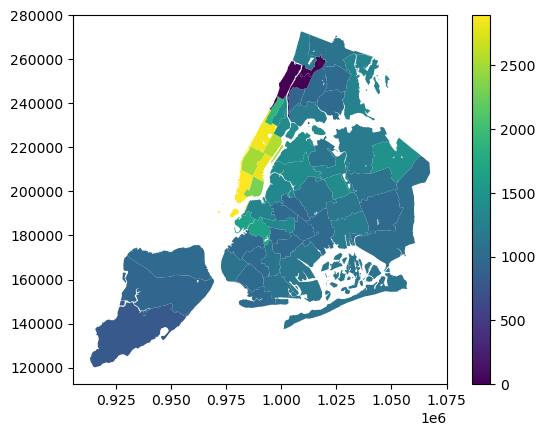

In [45]:
gdf.plot('rent2008', legend=True)

# Extra resources / references:

---
## ONS Style Guides
There is (currently) no map specific guidance, but more general aspects of the data visualisation and colour guidance still applies.
* General data visualisation guidelines: <a href="https://service-manual.ons.gov.uk/data-visualisation" target="_blank">https://service-manual.ons.gov.uk/data-visualisation</a>
* ONS guidelines on use of colour: <a href="https://ons-design.notion.site/Colour-335407345de94442b2adccbaa0b0b6e6" target="_blank">https://ons-design.notion.site/Colour-335407345de94442b2adccbaa0b0b6e6</a>

## Matplotlib Resources:

##### Tutorials: 
* maplotlib quickstart tutorials: <a href="https://matplotlib.org/stable/tutorials/index.html" target="_blank">https://matplotlib.org/stable/tutorials/index.html</a>
* A longer, more thorough tutorial: <a href="https://github.com/rougier/matplotlib-tutorial" target="_blank">https://github.com/rougier/matplotlib-tutorial</a>

## Other visualisation libraries:
* plotly: for interactive plotting, includes methods explicitly for geospatial plotting <a href="https://plotly.com/python/" target="_blank">https://plotly.com/python/</a>
* geoplot: built on top of matplotlib to simplify geospatial plotting <a href="https://residentmario.github.io/geoplot/index.html" target="_blank">https://residentmario.github.io/geoplot/index.html</a>

## Cheat-Sheets:

#### Matplotlib Essentials <a href="https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png" target="_blank">(open in new tab)</a> 
![image.png](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png)

#### Pandas vs. R cheatcheet <a href="https://datascientyst.com/content/images/2023/12/Pandas-vs-R-light.webp" target="_blank">(open in new tab)</a>
![image.png](https://datascientyst.com/content/images/2023/12/Pandas-vs-R-light.webp)